In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

    EDA (Data exploratory analysis)

    * Deep analysis

What is customer churn after analysis ?

Hypothesis :

if a customer signed up for Fiber optic, not SeniorCitizen, seems to not be interessted to additional internet service, with tenure about less than 12 and on month-to-month contract there is more chance that he is going to churn.


In [2]:
churn_data = pd.read_csv("dataset.csv")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
from scipy.stats import chi2_contingency,f_oneway

In [38]:
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges, errors='coerce')

In [39]:
qualitative_variables = churn_data.select_dtypes(include="object").columns
qualitative_variables = qualitative_variables.drop("customerID")
qualitative_variables = qualitative_variables.drop("Churn")
qualitative_variables

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [40]:
churn_data.replace("No internet service", "No", inplace=True)
churn_data.replace("No phone service", "No", inplace=True)

-- target var visualization according to the gender :
Churning from the company is not related to the gender of the customer.

<AxesSubplot:xlabel='Churn', ylabel='count'>

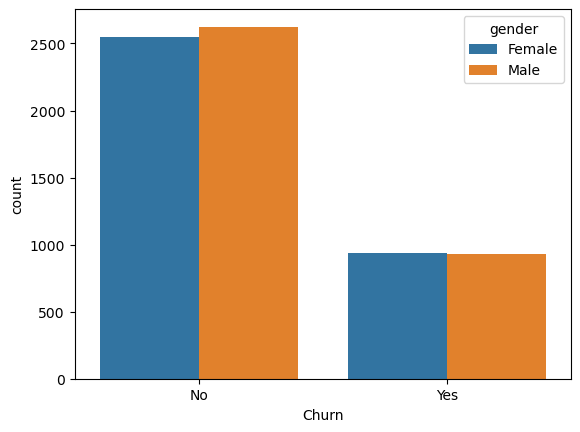

In [41]:
sns.countplot(x='Churn',hue='gender',data=churn_data)

The following code is about Khi2 test. This test help us to know if a qualitative variable is corrolate to the target variable

In [89]:
# let's H0 be the null hypothesis
# let's H1 be the alternative hypothesis

In [42]:
def hypothesis_test(column):
    print(f"------------------------------{column}---------------------------")
    contengency = pd.crosstab(churn_data.Churn,churn_data[f"{column}"])
    stat_result = chi2_contingency(contengency,correction=True)
    p_value = stat_result[1]
    print("H1 retained") if p_value < 0.05 else print("H0 retained")

In [43]:
for column in qualitative_variables:
    hypothesis_test(column)

------------------------------gender---------------------------
H0 retained
------------------------------Partner---------------------------
H1 retained
------------------------------Dependents---------------------------
H1 retained
------------------------------PhoneService---------------------------
H0 retained
------------------------------MultipleLines---------------------------
H1 retained
------------------------------InternetService---------------------------
H1 retained
------------------------------OnlineSecurity---------------------------
H1 retained
------------------------------OnlineBackup---------------------------
H1 retained
------------------------------DeviceProtection---------------------------
H1 retained
------------------------------TechSupport---------------------------
H1 retained
------------------------------StreamingTV---------------------------
H1 retained
------------------------------StreamingMovies---------------------------
H1 retained
------------------

-- target var visualization according to the seniorCitizen :
Those who are actually churning are less than 65. this means that those who churned are younger than the remaining.

<AxesSubplot:xlabel='Churn', ylabel='count'>

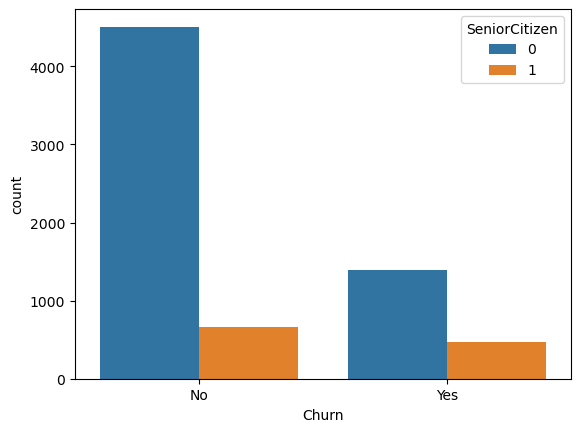

In [57]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=churn_data)

-- target var visualization according to InternetService :
Those who churned from the company tend to go for Fiber optic as internetService

<AxesSubplot:xlabel='Churn', ylabel='count'>

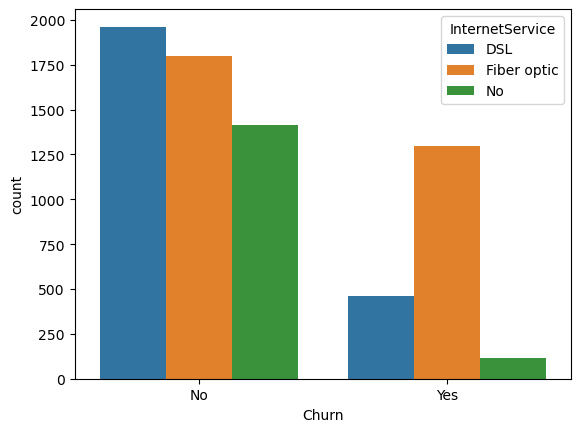

In [44]:
sns.countplot(x='Churn',hue='InternetService',data=churn_data)

-- target var visualization according to the partner :
There is a trend that customers who churned were more likely to not have a partner.

<AxesSubplot:xlabel='Churn', ylabel='count'>

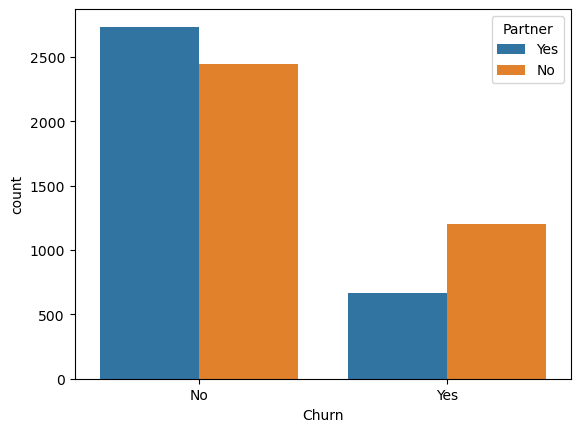

In [3]:
sns.countplot(x='Churn',hue='Partner',data=churn_data)

-- target var visualization according to Contract :
There is a trend that customers who churned were more likely to be on a Month-to-Month contract

<AxesSubplot:xlabel='Churn', ylabel='count'>

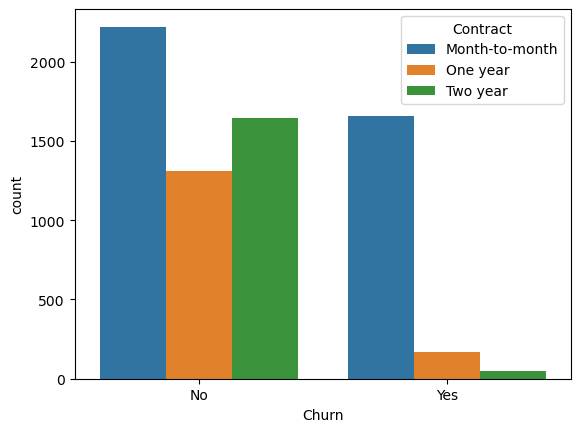

In [25]:
sns.countplot(x='Churn',hue='Contract',data=churn_data)

-- target var visualization according to Dependents :
There is a trend that customers who churned were more likely to not have a dependent.

<AxesSubplot:xlabel='Churn', ylabel='count'>

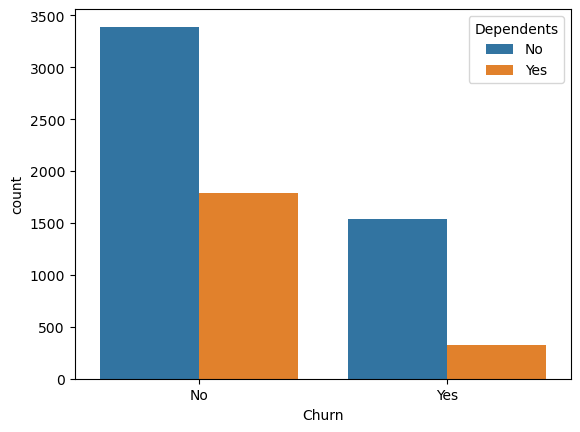

In [34]:
sns.countplot(x='Churn',hue='Dependents',data=churn_data)

-- target var visualization according to phoneService :
There is no relation between churning from the company and phoneService.

<AxesSubplot:xlabel='Churn', ylabel='count'>

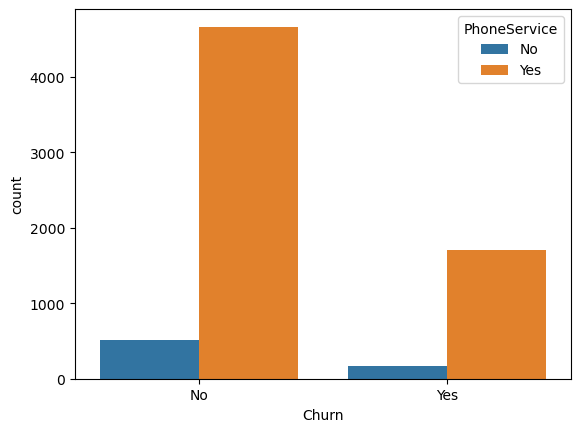

In [45]:
sns.countplot(x='Churn',hue='PhoneService',data=churn_data)

-- target var visualization according to MultipleLines :
There is a trend that those who churned have as many as customers who signed up for multiple lines and those who didn't.

<AxesSubplot:xlabel='Churn', ylabel='count'>

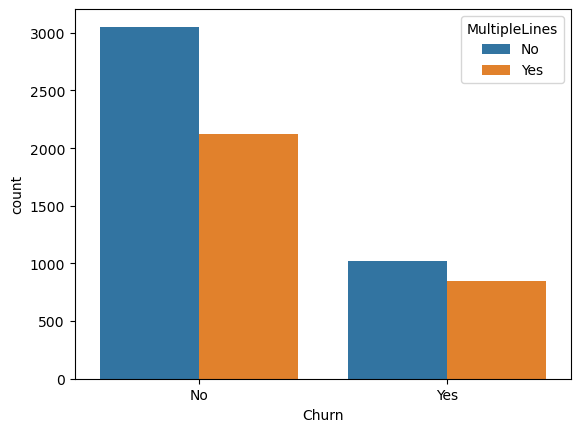

In [46]:
sns.countplot(x='Churn',hue='MultipleLines',data=churn_data)

-- target var visualization according to OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport :
The trend is that those who are actually churning are not interested to  additionnals services related to internetService.

<AxesSubplot:xlabel='Churn', ylabel='count'>

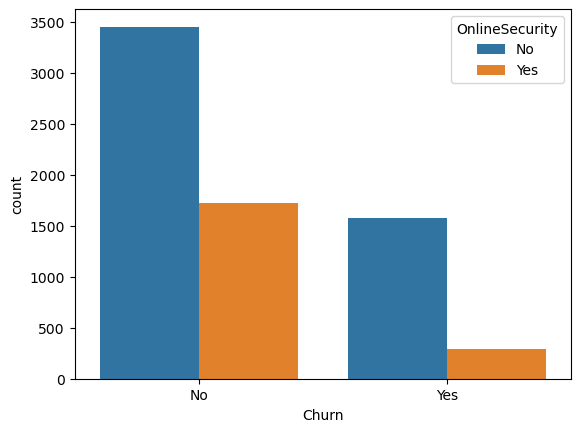

In [47]:
sns.countplot(x='Churn',hue='OnlineSecurity',data=churn_data)

<AxesSubplot:xlabel='Churn', ylabel='count'>

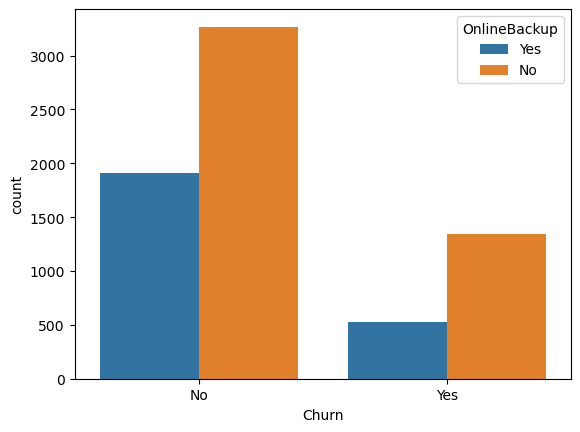

In [48]:
sns.countplot(x='Churn',hue='OnlineBackup',data=churn_data)

In [87]:
churn_data[(churn_data.Churn=="Yes")&(churn_data.OnlineBackup=="No") & (churn_data.OnlineSecurity=="No") & (churn_data.TechSupport=="No")&(churn_data.DeviceProtection=="No")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes
47,7760-OYPDY,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.65,144.15,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


-- target var visualization according to StreamingTV, StreamingMovies :
Among those who churned there are as many customer who use internet for streaming purpose through third party provider as there are customer who do not.

<AxesSubplot:xlabel='Churn', ylabel='count'>

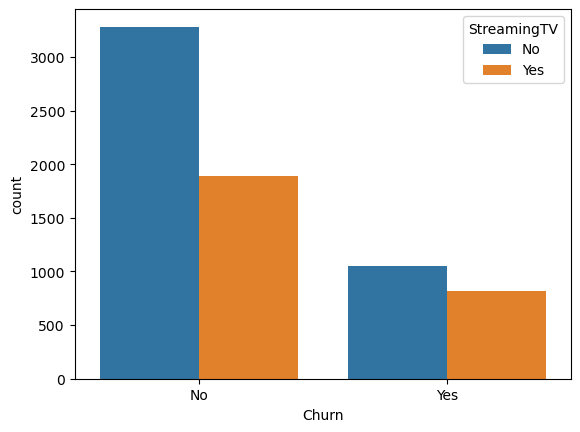

In [49]:
sns.countplot(x='Churn',hue='StreamingTV',data=churn_data)

<AxesSubplot:xlabel='Churn', ylabel='count'>

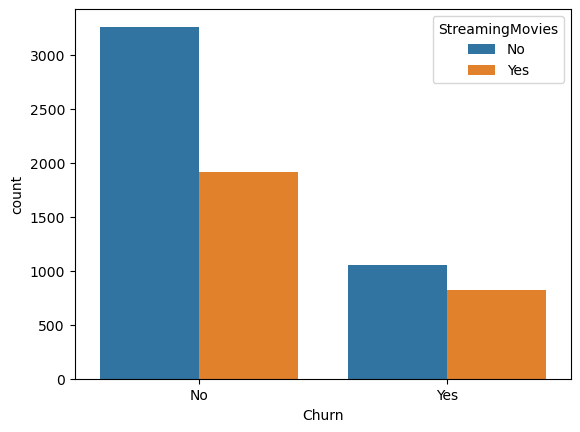

In [50]:
sns.countplot(x='Churn',hue='StreamingMovies',data=churn_data)

-- target var visualization according to PaperlessBilling :
There is a trend that those who churned used to go for PaperlessBilling than those who don't

<AxesSubplot:xlabel='Churn', ylabel='count'>

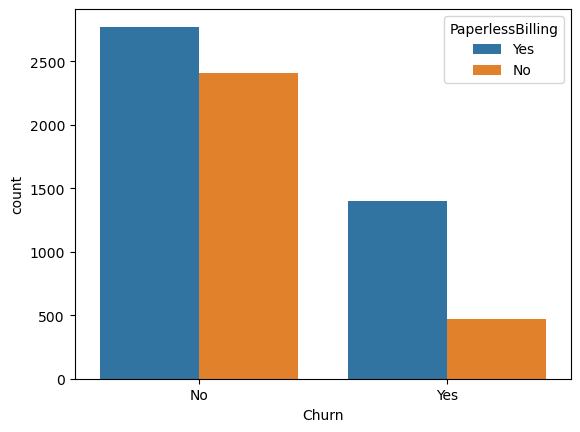

In [4]:
sns.countplot(x='Churn',hue='PaperlessBilling',data=churn_data)

-- target var visualization according to PaymentMethod :
There is a trend that those who churned prefer to use electronic check as payment method over others

<AxesSubplot:xlabel='Churn', ylabel='count'>

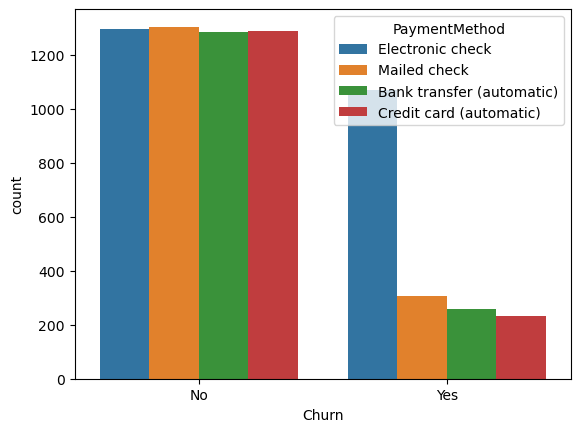

In [51]:
sns.countplot(x='Churn',hue='PaymentMethod',data=churn_data)

-- target var visualization according to tenure :
On average those who churned were more likely to be with the company about 10 months. In general they churned before one year. this should highlight the fact that those who churned were more likely to be on Month-to-Month contract. 

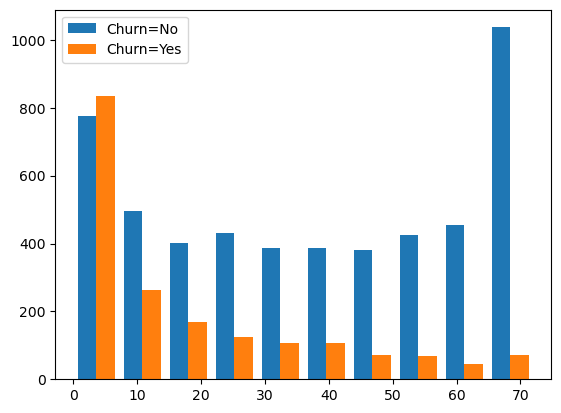

In [52]:
tenure_churn_no = churn_data[churn_data.Churn == "No"]["tenure"]
tenure_churn_yes = churn_data[churn_data.Churn == "Yes"]["tenure"]
plt.hist([tenure_churn_no,tenure_churn_yes],label=["Churn=No","Churn=Yes"])
plt.legend()

In [13]:
churn_data.groupby("Churn")["tenure"].median()

Churn
No     38.0
Yes    10.0
Name: tenure, dtype: float64

-- target var visualization according to MonthlyCharges, TotalCharge :
those who churned used to charge more than those who don't. This is obvious because we have seen previously that there is a tendency to opt for fiber optics. As we may know, fiber optics is more expensive than DSL. 

In [53]:
churn_data.groupby(["Churn","Contract"])["TotalCharges"].mean()

Churn  Contract      
No     Month-to-month    1521.927590
       One year          2903.569908
       Two year          3678.986103
Yes    Month-to-month    1164.460574
       One year          4066.212048
       Two year          5432.363542
Name: TotalCharges, dtype: float64

In [54]:
# ANOVA 
# Let's H0 be the null hypothesis H0: churning is not related to monthlycharge
# Let's H1 be the alternative hypothesis H1: churning is related to monthlycharge
f_statistic, p_value = f_oneway(churn_data[churn_data.Churn=="No"]["MonthlyCharges"],
       churn_data[churn_data.Churn=="Yes"]["MonthlyCharges"])

def ANOVA(p_value):
    return "H1 retained" if p_value < 0.05 else "H0 retained"

ANOVA(p_value)

'H1 retained'